<a href="https://colab.research.google.com/github/abisheksenthilkumar/Taylor_Swift_Lyrics_Generator/blob/main/Tay_lyrics_generator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import sys
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Activation, Flatten, Dropout, Dense, Embedding, TimeDistributed
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.utils import to_categorical
import tensorflow as tf

In [ ]:
!pip install np_utils

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 1.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for np_utils: filename=np_utils-0.6.0-py3-none-any.whl size=56441 sha256=5a884a9a1e88cf943cfe4a3cc81d56e9b30c5de88a5f06e61ae81c9856403ad3
  Stored in directory: /root/.cache/pip/wheels/b6/c7/50/2307607f44366dd021209f660045f8d51cb976514d30be7cc7
Successfully built np_utils


In [ ]:
from google.colab import files


uploaded = files.upload()

Saving taylor_swift_lyrics.csv to taylor_swift_lyrics.csv


In [ ]:
dataset = pd. read_csv('taylor_swift_lyrics.csv', encoding = "latin1")

In [ ]:
dataset.shape

(4862, 7)

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4862 entries, 0 to 4861
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   artist       4862 non-null   object
 1   album        4862 non-null   object
 2   track_title  4862 non-null   object
 3   track_n      4862 non-null   int64 
 4   lyric        4862 non-null   object
 5   line         4862 non-null   int64 
 6   year         4862 non-null   int64 
dtypes: int64(3), object(4)
memory usage: 266.0+ KB


In [ ]:
def processfirstline(lyrics, songid, songname, row):
  lyrics.append(row['lyric'] + '\n')
  songid.append(row['year']*100 + row['track_n'])
  songname.append(row['track_title'])
  return lyrics,songid,songname

In [ ]:
lyrics=[]
songid=[]
songname=[]
songnumber= 1
i=0
isfirstline = True
for index,row in dataset.iterrows():
  if(songnumber==row['track_n']):
    if (isfirstline):
      lyrics,songid,songname=processfirstline(lyrics,songid,songname,row)
      isfirstline=False
    else:
      lyrics[i]+=row['lyric']+'\n'
  else:
    lyrics,songid,songname=processfirstline(lyrics,songid,songname,row)
    songnumber=row['track_n']
    i+=1

In [ ]:
print(lyrics[69])

It's 2:00 AM, in your car
Windows down, you pass my street, the memories start
You say it's in the past
You drive straight ahead
You're thinking that I hate you now
Cause you still don't know what I never said
I wish you would come back
Wish I never hung up the phone like I did, and I
Wish you knew that
I'd never forget you as long as I live, and I
Wish you were right here, right now
It's all good
I wish you would
It's 2:00 AM, in my room
Headlights pass the window pane
I think of you
We're a crooked love
In a straight line down
Makes you want to run and hide
Then it makes you turn right back around
I wish you would come back
Wish I never hung up the phone like I did, and I
Wish you knew that
I'd never forget you as long as I live, and I
Wish you were right here, right now
It's all good
I wish you would
I wish we could go back
And remember what we were fighting for, and I
Wish you knew that
I miss you too much to be mad anymore, and I
Wish you were right here, right now
It's all good
I

In [ ]:
lyrics_data= pd.DataFrame({'songid': songid,'songname':songname,'lyrics':lyrics})

In [ ]:
with open('lyricstext.txt','w',encoding='utf-8') as filehandle:
  for listitem in lyrics:
    filehandle.write('%s \n' % listitem)

In [ ]:
textfilename='lyricstext.txt'
raw_text=open(textfilename, encoding='UTF-8').read()
raw_text=raw_text.lower()

In [ ]:
chars = sorted(list(set(raw_text)))
int_chars=dict((i, c) for i,c in enumerate(chars))
chars_int=dict((i, c) for c,i in enumerate(chars))

In [ ]:
n_chars=len(raw_text)
n_vocab=len(chars)

In [ ]:
seq_len=100
data_x = []
data_y = []
for i in range(0,n_chars - seq_len, 1):
  seq_in=raw_text[i:i+seq_len]
  seq_out=raw_text[i+seq_len]
  data_x.append([chars_int[char] for char in seq_in])
  data_y.append((chars_int[seq_out]))
n_patterns=len(data_x)
print('Total Patterns:',n_patterns)

Total Patterns: 173692


In [ ]:
x=np.reshape(data_x,(n_patterns,seq_len,1))

In [ ]:
x=x/float(n_vocab)

In [ ]:
y=to_categorical(data_y)

In [ ]:
y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
from sklearn.model_selection import train_test_split
x,x_test,y,y_test = train_test_split(x,y,random_state=42)

In [ ]:
len(data_x)

173692

In [ ]:
len(x)

130269

In [ ]:
len(x_test)

43423

In [ ]:
np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
model=Sequential()

In [ ]:
model.add(LSTM(256, input_shape =(x.shape[1],x.shape[2]),return_sequences=True))

In [ ]:
model.add(LSTM(256, return_sequences=True))
model.add(LSTM(256, return_sequences=True))
model.add(LSTM(256, return_sequences=True))

In [ ]:
model.add(Flatten())

In [ ]:
model.add(Dense(y.shape[1]))
model.add(Activation('softmax'))

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 256)          264192    
                                                                 
 lstm_1 (LSTM)               (None, 100, 256)          525312    
                                                                 
 lstm_2 (LSTM)               (None, 100, 256)          525312    
                                                                 
 lstm_3 (LSTM)               (None, 100, 256)          525312    
                                                                 
 flatten (Flatten)           (None, 25600)             0         
                                                                 
 dense (Dense)               (None, 58)                1484858   
                                                                 
 activation (Activation)     (None, 58)                0

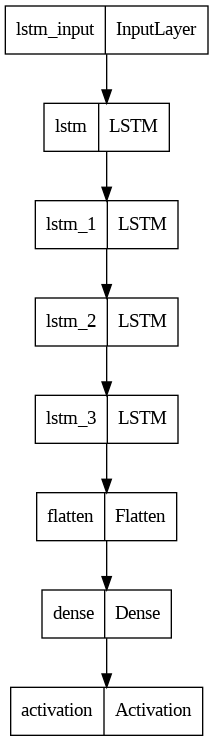

In [ ]:
from tensorflow import keras
import pydot
keras.utils.plot_model(model)

In [ ]:
checkpoint_name='weights-LTSM-improvement-{loss: .5f}-bigger.hdf5'
checkpoint = ModelCheckpoint(checkpoint_name, monitor='loss', verbose=1, save_best_only=True, mode='min')
callbacks_list=[checkpoint]

In [ ]:
# Ensure model_params is defined as shown in your snippet
model_params = {
    'epochs': 10,
    'batch_size': 128,
    'callbacks': callbacks_list,
    'verbose': 1,
    'validation_split': 0.2,
    'shuffle': True,
    'initial_epoch': 0
}

# Now, use **model_params to unpack the dictionary when calling model.fit()
model_history = model.fit(x, y, **model_params)

Epoch 1/10
815/815 [==============================] - ETA: 0s - loss: 3.0221 - accuracy: 0.1767
Epoch 1: loss improved from inf to 3.02207, saving model to weights-LTSM-improvement- 3.02207-bigger.hdf5
815/815 [==============================] - 3160s 4s/step - loss: 3.0221 - accuracy: 0.1767 - val_loss: 3.0260 - val_accuracy: 0.1727
Epoch 2/10


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


815/815 [==============================] - ETA: 0s - loss: 3.0103 - accuracy: 0.1769
Epoch 2: loss improved from 3.02207 to 3.01033, saving model to weights-LTSM-improvement- 3.01033-bigger.hdf5
815/815 [==============================] - 3141s 4s/step - loss: 3.0103 - accuracy: 0.1769 - val_loss: 3.0223 - val_accuracy: 0.1727
Epoch 3/10
815/815 [==============================] - ETA: 0s - loss: 3.0091 - accuracy: 0.1769
Epoch 3: loss improved from 3.01033 to 3.00907, saving model to weights-LTSM-improvement- 3.00907-bigger.hdf5
815/815 [==============================] - 3078s 4s/step - loss: 3.0091 - accuracy: 0.1769 - val_loss: 3.0227 - val_accuracy: 0.1727
Epoch 4/10
815/815 [==============================] - ETA: 0s - loss: 3.0090 - accuracy: 0.1769
Epoch 4: loss improved from 3.00907 to 3.00903, saving model to weights-LTSM-improvement- 3.00903-bigger.hdf5
815/815 [==============================] - 3117s 4s/step - loss: 3.0090 - accuracy: 0.1769 - val_loss: 3.0206 - val_accuracy: 0

KeyboardInterrupt: 